#**Energy Demand prediction using SVM and Random Forest**

Predicting energy budget of a building for a month

............DATA REQUIRED
- Weather data for 3 years
- Energy consumption record of 3 years
- Energy cost of a month

In [1]:
# we will use the pandas library for data analysis and manipulation.
import pandas as pd

# we will use numpy for adding support for large, multi-dimensional arrays and matrices.
import numpy as np

# For data visualization, we import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Load the building electricity consumption data

In [2]:
Energy1 = pd.read_excel('/content/Building energy consumption racord.xlsx')
Energy1

,Time,building 41
0,2016-01-01 01:00:00,23.783228
1,2016-01-01 02:00:00,23.783228
2,2016-01-01 03:00:00,23.783228
3,2016-01-01 04:00:00,23.783228
4,2016-01-01 05:00:00,23.783228
...,...,...
26298,2018-12-31 19:00:00,18.602723
26299,2018-12-31 20:00:00,18.838200
26300,2018-12-31 21:00:00,18.602723
26301,2018-12-31 22:00:00,18.131768


In [3]:
# set time column as index
Energy = Energy1.set_index('Time')
Energy

,building 41
Time,
2016-01-01 01:00:00,23.783228
2016-01-01 02:00:00,23.783228
2016-01-01 03:00:00,23.783228
2016-01-01 04:00:00,23.783228
2016-01-01 05:00:00,23.783228
...,...
2018-12-31 19:00:00,18.602723
2018-12-31 20:00:00,18.838200
2018-12-31 21:00:00,18.602723


In [4]:
# Checking the description of the data
Energy.describe()

,building 41
count,26303.000000
mean,25.694969
std,6.317738
min,15.541515
25%,20.957498
50%,23.783228
75%,28.728255
max,59.340330


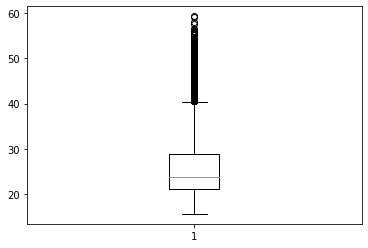

In [5]:
plt.boxplot(Energy['building 41'])
plt.show()

In [6]:
#Load the Weather data from the excel file
Path= "/content/WeatherData.xlsx"
knmi= pd.read_excel(Path)
knmi

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
1,2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2,2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
3,2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
4,2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...,...
26298,2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
26299,2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
26300,2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336
26301,2018-12-31 22:00:00,12,22,68,94,7.6,0.94,0,0,40,70,10332


In [7]:
#Set the Time column as index
knmi = knmi.set_index("Time")
knmi

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
Time,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336


In [8]:
#concatenating the datasets of weather data and electricity consumption
df = pd.concat([knmi, Energy], axis=1) #axis =1 for considering the columns
df

,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P,building 41
Time,,,,,,,,,,,,
2016-01-01 01:00:00,1,1,38,82,6.6,0.82,0,0,30,70,10224,23.783228
2016-01-01 02:00:00,1,2,43,83,7.0,0.83,0,0,40,80,10228,23.783228
2016-01-01 03:00:00,1,3,46,91,5.9,0.91,0,0,30,80,10232,23.783228
2016-01-01 04:00:00,1,4,36,96,4.2,0.96,0,0,20,40,10237,23.783228
2016-01-01 05:00:00,1,5,37,98,4.0,0.98,0,0,20,30,10240,23.783228
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,78,93,8.7,0.93,0,0,30,60,10341,18.602723
2018-12-31 20:00:00,12,20,74,92,8.5,0.92,0,0,30,50,10338,18.838200
2018-12-31 21:00:00,12,21,66,89,8.2,0.89,0,0,40,60,10336,18.602723


In [9]:
# check missing data status
df.isna().sum()

month          0
HH             0
TD             0
U              0
Temp           0
RH             0
Q              0
DR             0
FF             0
FX             0
P              0
building 41    0
dtype: int64

We have no missing values in the dataframe. Our output (dependent variable) is building 12 column. other columns of the data set are independent values. We can find strong and weak correlation with different variables. With .corr() method, we can utilize Pearson's correlation coefficient which is a measure of the strength of a linear association between two variables. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

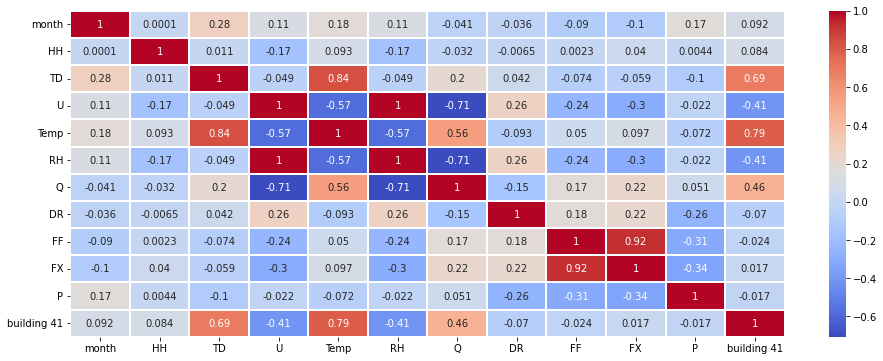

In [10]:
plt.figure(figsize = (16,6)) # Create matplotlib figure
sns.heatmap(df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
plt.xticks(rotation='horizontal')

From the heatmap, we see temperature (Temp) correlates very positively with building electricity demand. Relative humidity (U) and hourly sum of precipitation (RH) are two highest negatively correlated features. in addition, both of these features are also multi-collinear. Which means, either of them can be utilized for predicting electricity demand. 
#Plot energy consumption data against U and Temp

In [11]:
# Resample the energy of the building over a week using the resmaple function and the mean  function. 
df_sum_weekly = df['building 41'].resample('W').mean()

# Resample the temperature over a week. 
df_feature1= df["Temp"].resample("W").mean()

# Resample the relative humidity over a week. 
df_feature2 = df["U"].resample("W").mean()

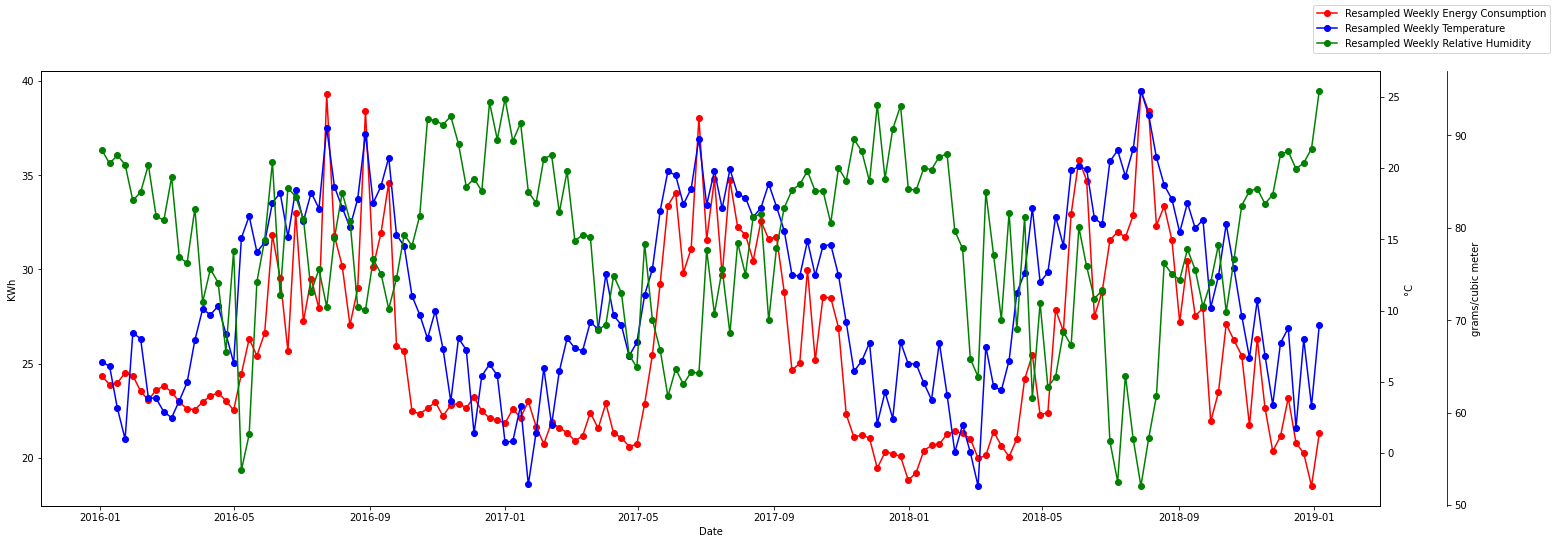

In [12]:
# plot the result
fig,ax = plt.subplots(figsize=(24,8))  # Create matplotlib figure
ax.plot(df_sum_weekly.index, df_sum_weekly, color="red",marker="o")
ax.set_ylabel("KWh")
ax.set_xlabel('Date')
ax2 = ax.twinx() #Create a new Axes with an invisible x-axis and an independent y-axis positioned opposite to the original one (i.e. at right).
ax3 = ax.twinx()
ax2.plot(df_sum_weekly.index, df_feature1, color="blue", marker="o")
ax2.set_ylabel("°C")
ax3.plot(df_sum_weekly.index, df_feature2, color="green", marker="o")
ax3.set_ylabel("grams/cubic meter")
ax3.spines["right"].set_position(("axes", 1.05))
fig.legend(["Resampled Weekly Energy Consumption","Resampled Weekly Temperature","Resampled Weekly Relative Humidity"], loc='upper right')
fig.show()

We see that energy demand of a building varies with temperature. Variations of the energy consumption across various seasons are also visible.
Negative linear correlation of Relative Humidity can be explained. It is not just correlational with Energy consumption but also has high negative correlation (-0.57) with temperature. The correlations observed are well expected.

## Feature selection
We can now select features based on their strong coorealtion with the output and remove some input features which are strongly coorelated with each other to avoid the problem of multicolinearity. It is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.


We see, the energy consumption has a seasonal effect which is reflected on the different months of the year. So, it has more correlation with month than hours of the day. 

In [13]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model.
knmi_updated= knmi.loc[:, ~knmi.columns.isin(["TD","U","DR","FX"])] # ~ sign drops the columns we select
knmi_updated

,month,HH,Temp,RH,Q,FF,P
Time,,,,,,,
2016-01-01 01:00:00,1,1,6.6,0.82,0,30,10224
2016-01-01 02:00:00,1,2,7.0,0.83,0,40,10228
2016-01-01 03:00:00,1,3,5.9,0.91,0,30,10232
2016-01-01 04:00:00,1,4,4.2,0.96,0,20,10237
2016-01-01 05:00:00,1,5,4.0,0.98,0,20,10240
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,12,19,8.7,0.93,0,30,10341
2018-12-31 20:00:00,12,20,8.5,0.92,0,30,10338
2018-12-31 21:00:00,12,21,8.2,0.89,0,40,10336


### Now we develop a machine learning regression model based on the weather parameters to predict the energy consumption of the building.
Various forecasting techniques can be utilized with machine learning models. (Deng et al., 2018) tested the performance of various machine learning models on one of the largest database on buildings in CBECS, and found both Support Vector Machine (SVM) and Random Forest (RF) being able to handle the non-linear relationships better as they perform dynamic local investigations better rather than global optimization. Therefore, we are going to consider SVM and RF to develop the model.  

In [14]:
#Splitting the data into training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(knmi_updated, Energy, test_size = 0.2, random_state = 0)
y_train

,building 41
Time,
2016-11-29 03:00:00,22.370362
2018-01-29 11:00:00,24.725137
2018-07-03 20:00:00,36.028058
2017-09-05 16:00:00,44.034292
2017-03-08 06:00:00,19.309155
...,...
2017-06-30 20:00:00,29.434687
2018-03-29 17:00:00,21.899408
2017-02-14 06:00:00,21.192975


In [15]:
y_train = y_train.values.ravel() #ravel is a numpy function to change a 2-dimensional array or a multi-dimensional array into a continuous flattened array.
y_train

array([22.3703625, 24.7251375, 36.0280575, ..., 21.192975 , 19.5446325,
       20.72202  ])

In [16]:
y_test = y_test.values.ravel()
y_test

array([19.5446325, 32.2604175, 20.0155875, ..., 20.72202  , 28.4927775,
       25.1960925])

In [17]:
# importing regression model 
from sklearn.svm import SVR

#Creating an instance or object of the support vector machine regressor class
SVReg = SVR(kernel= 'rbf') # It must be one of 'linear', 'poly', 'rbf', 'sigmoid' (rbf - Radial Basis Function is used in machine learning to find a non-linear regression line.)

# fitting the regression model to the training dataset
SVReg.fit(X_train, y_train) #Fit the SVM model according to the given training data.

SVR()

Three hyperparameters for the SVR function are Epsilon, C and Gamma.

Epsilon represents the **maximum error allowed in the function**, and determines the desired accuracy of the model. A smaller ϵ indicates that a more accurate model is required. 

Parameters C is used to **set the tolerance for points which fall outside of the error boundaries set by ϵ**. A larger value for C indicates a larger tolerance for points outside of ϵ.

The gamma parameter defines the **influence of a single point on the model**. A low value indicates that points have a far reach, meaning that also points that are situated far away from the regression line are taken into account. A low value results in a more linear regression line. On the other hand, a high value for gamma indicates that points have a close reach, which results in a more complex or wobbly line around the nearby points. With default 'scale', the value of gamma is 1 / (n_features * X.var()).

In [18]:
# predicting on the training data
Predicted_Train= SVReg.predict(X_train)
Predicted_Train

array([23.33747534, 23.52037698, 23.57941113, ..., 23.3715236 ,
       23.38476265, 23.42220531])

In [19]:
# To evaluate the performance of the model, importing error metrics function
from sklearn.metrics import r2_score #(coefficient of determination) regression score function.
from sklearn.metrics import mean_squared_error #The MSE indicates the average distance of the best fit regression line to the observed values.

print(r2_score(y_train,Predicted_Train))
print(mean_squared_error(y_train,Predicted_Train))

0.01964854734223298
39.16973198670731


##Scaling to improve the model performance
Scaling is used to bring all features to the same level of magnitudes. Without scaling, the features with high magnitudes will have more weight in the ‘best fit’ calculation, which tries to minimize the distance between the fit line and the observed values (Asaithambi, 2017).

In [20]:
# Import the required packages
from sklearn.preprocessing import StandardScaler #standardizes the data to a range in which the mean is equal to 0 and the standard deviation is 1. It assumes the data is normally distributed.
from sklearn.preprocessing import MinMaxScaler #normalizes the data and brings the values between 0 (lowest value) and 1 (highest value)
from sklearn.preprocessing import RobustScaler #standardizes the data. But is more robust to outliers because it only scales the data according to the Interquartile Range (IQR) between the 1st and 3rd quartile.

#Generate the scaler
sc1= StandardScaler()
sc2= MinMaxScaler()
sc3= RobustScaler()

In [21]:
#Scaling the input data
X1 = sc1.fit_transform(knmi_updated)
X2 = sc2.fit_transform(knmi_updated)
X3 = sc3.fit_transform(knmi_updated)

#We do not need to scale the output data as we have only one output.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

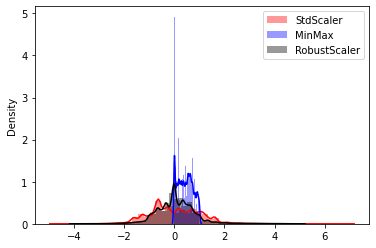

In [22]:
#plotting to visually explore the scaled features
sns.distplot(X1,color="red",label="StdScaler")
sns.distplot(X2,color="blue",label="MinMax")
sns.distplot(X3,color="black",label="RobustScaler")
plt.legend()

In [23]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [24]:
#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)
regr

SVR()

In [25]:
# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

In [26]:
#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8676607662388549
5.287585695616701


In [27]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.865011398619708
5.364047670294079


Now we test for MinMax scaling

In [28]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X2, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8543589078950263
5.819058592240028


In [29]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8514063183174978
5.904673312407657


Finally, we test for Robust scaling

In [30]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X3, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.861376711378752
5.538663759501534


In [31]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8581322813412404
5.637403439847455


We observe that, when the R2 value increases and RMS error decreases from the previous model, we get a better performing model. Therefore, Standard scaler is the best fit for our model which can explain 86.78% of the variance of the training dataset and 86.52% of the variance of the test dataset. The prediction accuracy will vary +-2.3 (root mean squared error of 5.5).
##Same way we can compare between different karnels

In [32]:
#Split your data set into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='poly', degree=5) # y = ax5 + bx4 + cx3 + dx2 + ex + f

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.6243431637454044
15.009288306939018


###We see, rbf (radial basis Function) kernel performed better.
Now we can check the performance of the model by introducing other features which we removed earlier. The weather parameters used did not include the dew point temperature (TD), relative humidity (U), Duration of perception (DR) and Wind Gust (FX). We have assessed with lower number of varaibles. Adding extra variables may improve the performance of the model.
Only parameter U is left out of the regression model, as U and RH (Hourly Sum of Precipitation) have a correlation of 100%. As a result, including only one of the two parameters in the model is sufficient.

In [33]:
X4 = sc1.fit_transform(knmi.loc[:, ~knmi.columns.isin(["U"])])

In [34]:
#We redefine the data for standard scaling and split into training (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X4, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#building the regressor and fit the training data to the regressor
regr = SVR(kernel='rbf')
regr= regr.fit(X_train, y_train)

# fitting the regression model to the training data
regr.fit(X_train, y_train) #Fit the SVM model according to the given training data.
# predicting on the training data
predict_train= regr.predict(X_train)

#testing the model training accuracy 
print(r2_score(y_train, predict_train))
print(mean_squared_error(y_train, predict_train))

0.8692363907335192
5.224631956934131


In [35]:
#Predicting on the test data
pred= regr.predict(X_test)
##testing the models accuracy on the test data
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.8656435535968942
5.338927701659932


We see the improvement of the prediction accuracy. A model in which all weather variables are taken into account returns the best results, despite the low correlation between the added parameters with the energy demand.

Text(0, 0.5, 'kWh')

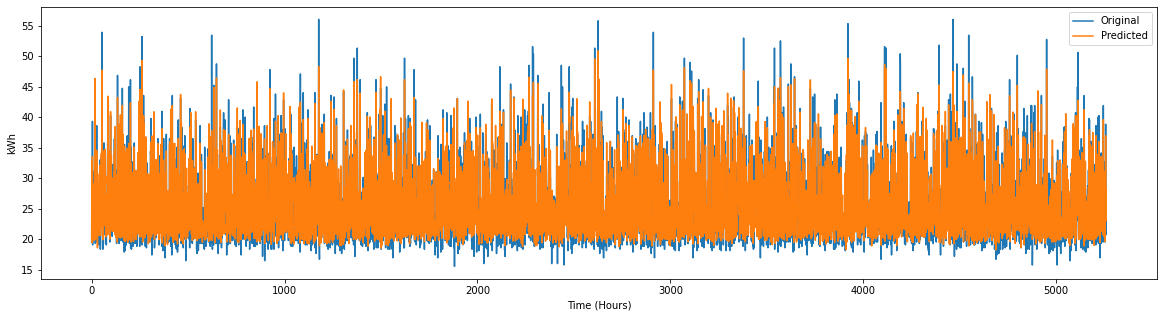

In [36]:
plt.figure(figsize = (20,5))
plt.plot(y_test, label="Original")
plt.plot(pred, label="Predicted")
plt.legend(loc='best')
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')

We see the adjusted hyper aprameter performs better than the default settings. 
###Check the RF regressor model performance

In [37]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=12, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9433647326769188
2.26284995654006


In [38]:
#importing the ensemble module for the random forest regressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating an instance of the random forest regressor
RFReg = RandomForestRegressor(max_depth=12, random_state=0)

# fitting the regression model to the training data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, Energy, test_size=0.2, random_state=0, shuffle= "False")
y_train2 = y_train2.values.ravel()
y_test2 = y_test2.values.ravel()
RFReg.fit(X_train2, y_train2)

#Predicting on the training data
Predicted_Train2= RFReg.predict(X_train2)

#Caculating R2 score and Root mean square error
print(r2_score(y_train2, Predicted_Train2))
print(mean_squared_error(y_train2, Predicted_Train2))

0.9413680428300156
2.3426272710447176


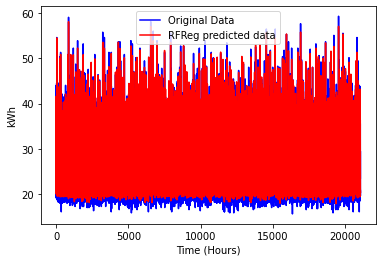

In [39]:
# Lets visualise our fit to the training data.
plt.plot(y_train2, color="b",label= 'Original Data')
plt.plot(Predicted_Train2, color ="red", label="RFReg predicted data")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')
plt.show()

In [40]:
#Predicting on the test set (X_test)
Predicted_Test2 = RFReg.predict(X_test2)

#Caculating R2 score and Root mean square error
print(r2_score(y_test2,Predicted_Test2))
print(mean_squared_error(y_test2,Predicted_Test2))

0.8914761615776285
4.312416283363921


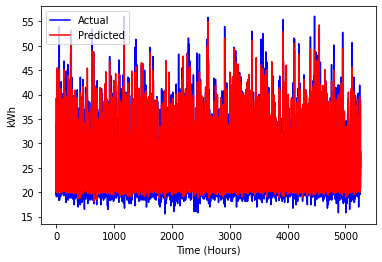

In [41]:
# Lets visualise our fit to the test data.
plt.plot(y_test2, color='blue', label="Actual")
plt.plot(Predicted_Test2, color='Red', label="Predicted")
plt.xlabel('Time (Hours)')
plt.ylabel('kWh')
plt.legend(loc='best')

#Allocate budget using predictive modeling
With the help of energy price and predicted demand, we can calculate the estimated cost of energy for the month of January. Now we have a trained model. 

In [42]:
# Import the weather cost file
path= "/content/Weather_Cost.xlsx"
weather_cost = pd.read_excel(path)
weather_cost

,Time,month,HH,TD,U,Temp,RH,Q,DR,FF,FX,P
0,2019-01-01 00:00:00,1,1,68,96,73,1,0,6,40,90,10323
1,2019-01-01 01:00:00,1,2,65,94,74,-1,0,0,40,70,10320
2,2019-01-01 02:00:00,1,3,63,93,73,0,0,0,40,70,10314
3,2019-01-01 03:00:00,1,4,61,92,73,0,0,0,50,60,10308
4,2019-01-01 04:00:00,1,5,58,92,69,0,0,0,50,70,10299
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2019-01-31 19:00:00,1,20,-24,93,-15,0,0,0,30,60,9929
740,2019-01-31 20:00:00,1,21,-22,95,-15,0,0,0,30,60,9920
741,2019-01-31 21:00:00,1,22,-24,91,-11,0,0,0,40,70,9911
742,2019-01-31 22:00:00,1,23,-25,87,-6,0,0,0,50,80,9900


In [43]:
# Make time column as index
weather_cost = weather_cost.set_index('Time')

In [44]:
#check missing value
weather_cost.isna().sum()

month    0
HH       0
TD       0
U        0
Temp     0
RH       0
Q        0
DR       0
FF       0
FX       0
P        0
dtype: int64

In [45]:
#remove relative humidity column from the data set
weather_cost_updated= weather_cost.loc[:, ~weather_cost.columns.isin(['U'])]

In [46]:
#scale the input data
X5 = sc1.transform(weather_cost_updated)

In [47]:
#predict the consumption
predicted = RFReg.predict(X5)
predicted.shape

(744,)

In [48]:
#Converting the predicted array into a dataframe so it is easier when plotting to show the time index
predicted= pd.DataFrame(predicted, columns=['kWh'])
predicted

,kWh
0,45.327064
1,45.305871
2,45.320000
3,45.506027
4,45.334128
...,...
739,22.577730
740,22.568992
741,22.545547
742,22.538493


In [49]:
#Import the index from the weather cost file
predicted['Time']= weather_cost.index
predicted

,kWh,Time
0,45.327064,2019-01-01 00:00:00
1,45.305871,2019-01-01 01:00:00
2,45.320000,2019-01-01 02:00:00
3,45.506027,2019-01-01 03:00:00
4,45.334128,2019-01-01 04:00:00
...,...,...
739,22.577730,2019-01-31 19:00:00
740,22.568992,2019-01-31 20:00:00
741,22.545547,2019-01-31 21:00:00
742,22.538493,2019-01-31 22:00:00


In [50]:
#Set the time column as index
predicted= predicted.set_index('Time')
predicted

,kWh
Time,
2019-01-01 00:00:00,45.327064
2019-01-01 01:00:00,45.305871
2019-01-01 02:00:00,45.320000
2019-01-01 03:00:00,45.506027
2019-01-01 04:00:00,45.334128
...,...
2019-01-31 19:00:00,22.577730
2019-01-31 20:00:00,22.568992
2019-01-31 21:00:00,22.545547


Text(0.5, 0, 'Time')

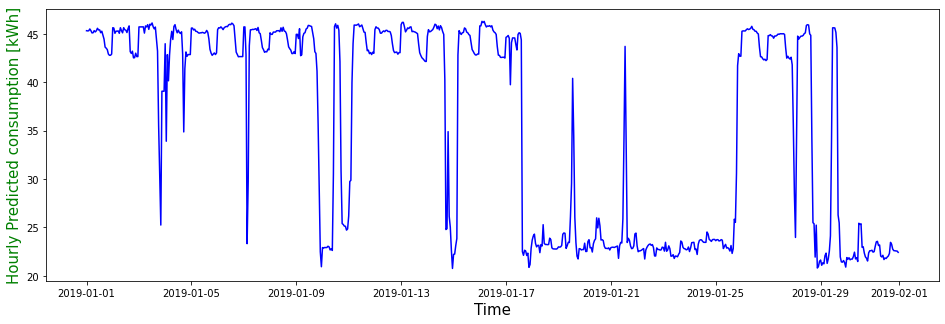

In [51]:
#Plot the hourly forecast consumption in kWh 
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(predicted,  label='Hourly Predicted consumption',color = 'blue')
ax.set_ylabel('Hourly Predicted consumption [kWh]',size=15, color='green')
ax.set_xlabel('Time',size=15)

#Plot the hourly forecast consumption in kWh and calculated price for the whole month

In [52]:
#Calculating the hourly consumtion cost.
Hourly_Cost= predicted*0.23
Hourly_Cost

,kWh
Time,
2019-01-01 00:00:00,10.425225
2019-01-01 01:00:00,10.420350
2019-01-01 02:00:00,10.423600
2019-01-01 03:00:00,10.466386
2019-01-01 04:00:00,10.426850
...,...
2019-01-31 19:00:00,5.192878
2019-01-31 20:00:00,5.190868
2019-01-31 21:00:00,5.185476


In [53]:
#Resampling the hourly consumption charges into daily by using the resample function and sum
Daily_Cost = Hourly_Cost.resample("D").sum()

print("total cost", Daily_Cost.sum())

total cost kWh    6099.404493
dtype: float64


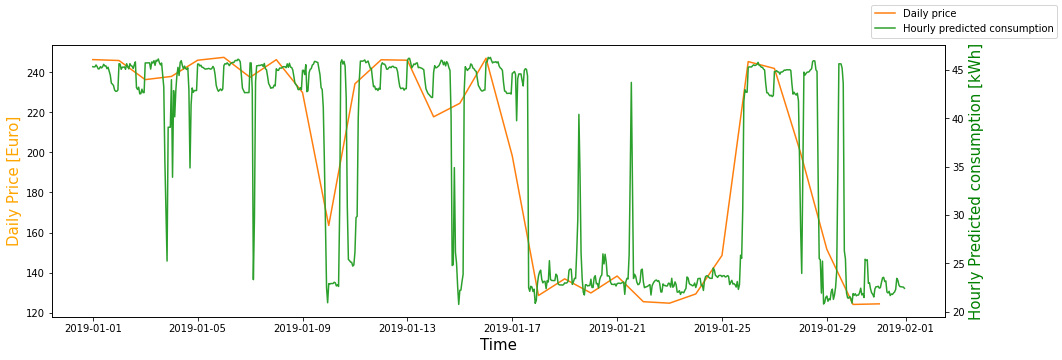

In [54]:
fig, ax = plt.subplots(figsize=(16,5))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax.plot(Daily_Cost, label= 'Daily price', color = 'tab:orange')
ax2.plot(predicted, label='Hourly predicted consumption', color = 'tab:green')
ax.set_ylabel('Daily Price [Euro]', size=15, color='orange')
ax2.set_ylabel('Hourly Predicted consumption [kWh]',size=15, color='green')
ax.set_xlabel('Time',size=15)
fig.legend()

##Set a visual threshold in the forecast when the model predicts higher than a budget limit

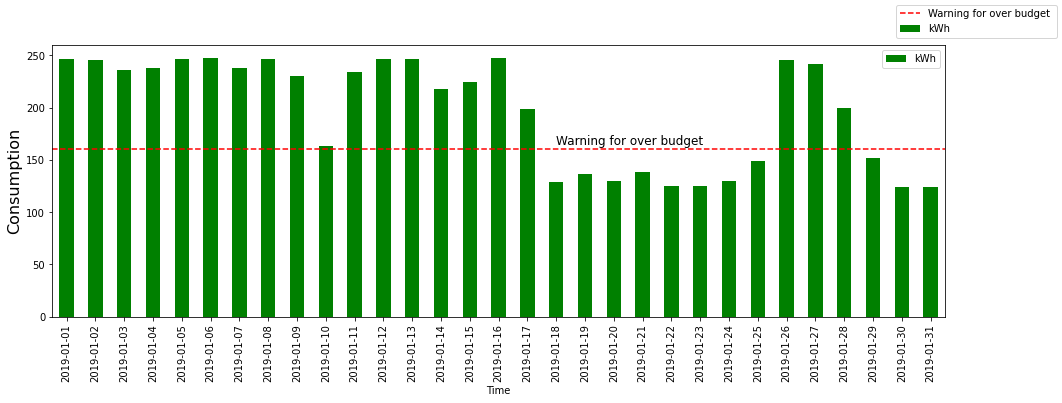

In [55]:
fig = plt.figure(figsize = (16,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
Daily_Cost.plot(kind='bar', ax=ax, rot=0,color='green')
ax.axhline(y=160, color='red', linestyle='--', label="Warning for over budget ")
plt.text(17, 165, 'Warning for over budget', fontsize=12)

ax.set_ylabel('Consumption', size=16, color='black')
plt.xticks(rotation='vertical')
ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in Daily_Cost.index])
fig.legend()